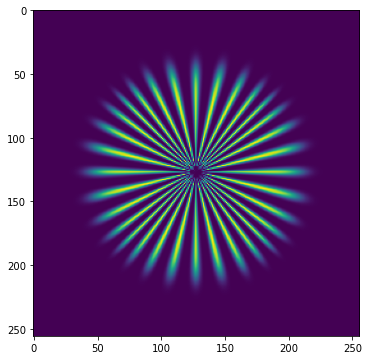

In [3]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d

input_name = "D:\\images\\tnia-python-images\\notebooks\\deconvolution\\sinuosidal siemens star\\ref.tif"
img = imread(input_name)
img = img.astype('float32')
fig = imshow2d(img)

(256, 256)


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\psfs.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  psf = fftshift(ifftn(ifftshift(otf)).astype(np.float32))


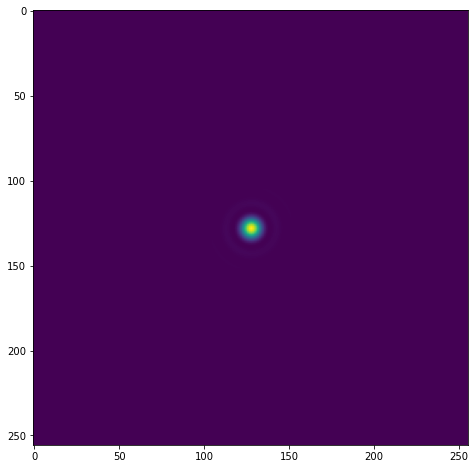

In [4]:
from tnia.deconvolution.psfs import paraxial_psf

n=256
wavelength = 500
na=1.4
pixel_size = 20

psf=paraxial_psf(n, wavelength, na, pixel_size)

print(psf.shape)
fig=imshow2d(psf,8,8)

In [5]:
from tnia.deconvolution.forward import forward

float32 float32 float32
0.99994814 1076.0


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\forward.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  return poisson(field_imaged.astype(float))


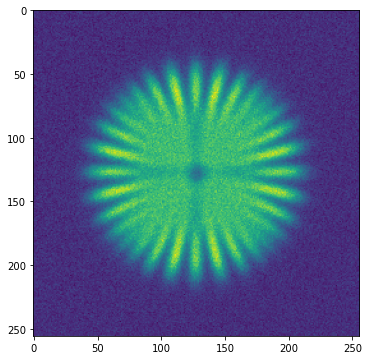

In [6]:
img = forward(star, psf,500.,500., True).astype('float32')
fig = imshow2d(img)
print(star.dtype, img.dtype, psf.dtype)
print(star.max(), img.max())

In [21]:
decon_sk.min()

1.0

In [12]:
from skimage.restoration import richardson_lucy

In [62]:
import numpy as np
from numpy.fft import fftn, ifftn, fftshift 

def richardson_lucy_np(image, psf, num_iters):
    
    otf = fftn(fftshift(psf))
    otf_ = np.conjugate(otf)    
    estimate = image# np.ones(image.shape)/image.sum()

    for i in range(num_iters):
        #print(i)
        
        reblurred = ifftn(fftn(estimate) * otf)
        ratio = image / (reblurred + 1e-30)
        estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)
        

    return estimate

In [63]:
from tnia.nd.ndutil import centercrop2d

psf2=centercrop2d(psf,(64,64))
psf2=psf2/psf2.sum()

C:\Users\bnort\AppData\Local\Temp\ipykernel_24776\159700553.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)


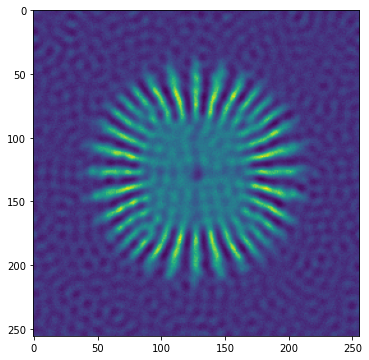

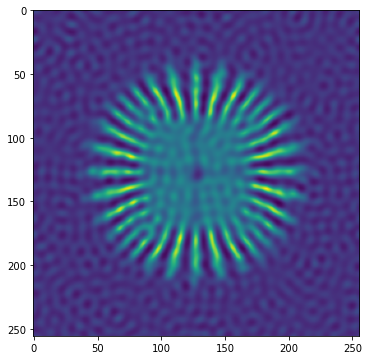

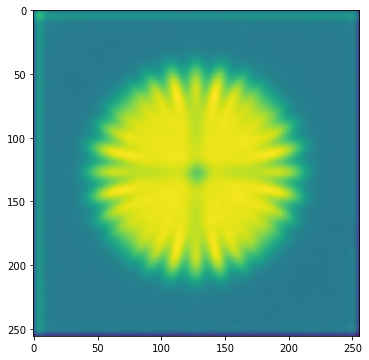

In [64]:
decon_np2 = richardson_lucy_np(img, psf,1000)
decon_sk = richardson_lucy(img, psf, iterations=1, clip=False)

#decon100 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 100)
#decon1000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 1000)
#decon10000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 10000)

fig = imshow2d(decon_np2)
fig = imshow2d(decon_np)
fig = imshow2d(decon_sk)

C:\Users\bnort\AppData\Local\Temp\ipykernel_24776\3084407095.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)


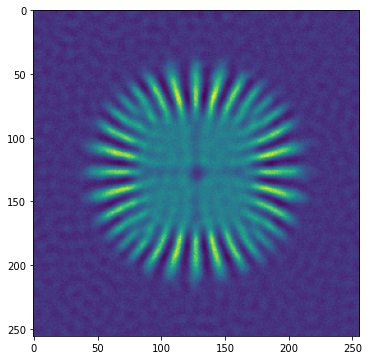

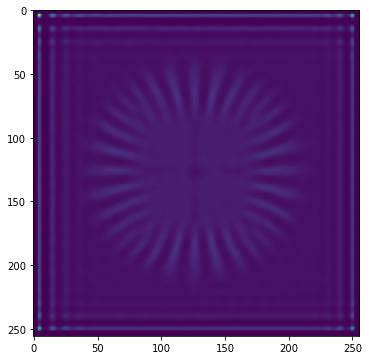

In [38]:
decon_np = richardson_lucy_np(img, psf,100)
decon_sk = richardson_lucy(img, psf, iterations=100, clip=False)

#decon100 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 100)
#decon1000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 1000)
#decon10000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 10000)

fig = imshow2d(decon_np)
fig = imshow2d(decon_sk)

In [18]:
help(richardson_lucy)

Help on function richardson_lucy in module skimage.restoration.deconvolution:

richardson_lucy(image, psf, iterations=50, clip=True, filter_epsilon=None)
    Richardson-Lucy deconvolution.
    
    Parameters
    ----------
    image : ndarray
       Input degraded image (can be N dimensional).
    psf : ndarray
       The point spread function.
    iterations : int, optional
       Number of iterations. This parameter plays the role of
       regularisation.
    clip : boolean, optional
       True by default. If true, pixel value of the result above 1 or
       under -1 are thresholded for skimage pipeline compatibility.
    filter_epsilon: float, optional
       Value below which intermediate results become 0 to avoid division
       by small numbers.
    
    Returns
    -------
    im_deconv : ndarray
       The deconvolved image.
    
    Examples
    --------
    >>> from skimage import img_as_float, data, restoration
    >>> camera = img_as_float(data.camera())
    >>> from sci

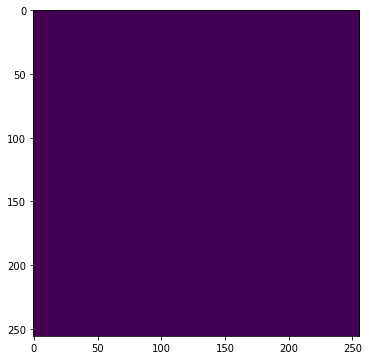

In [53]:
image=img
float_type='float32'
im_deconv = np.full(image.shape, image.mean(), dtype=float_type)
fig = imshow2d(im_deconv)

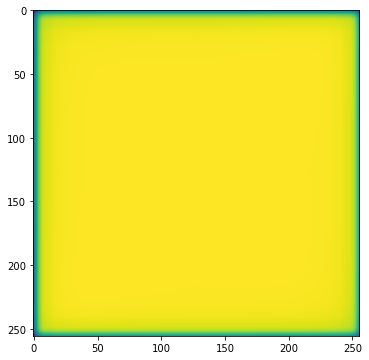

In [54]:
from scipy.signal import convolve
eps=1e-12
conv = convolve(im_deconv, psf, mode='same') + eps
fig=imshow2d(conv)

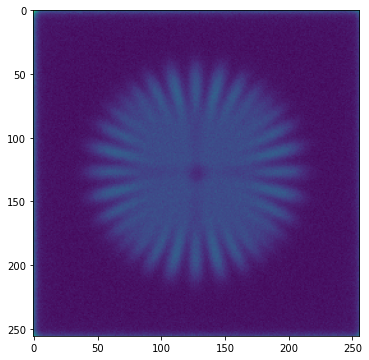

In [55]:
relative_blur = image / conv
fig=imshow2d(relative_blur)

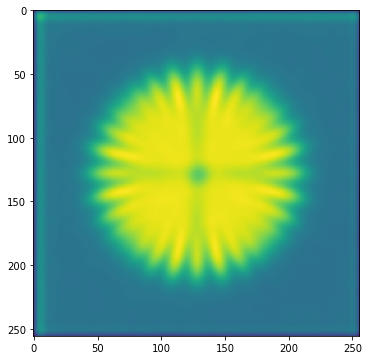

In [56]:
im_deconv *= convolve(relative_blur, psf, mode='same')
fig = imshow2d(im_deconv)

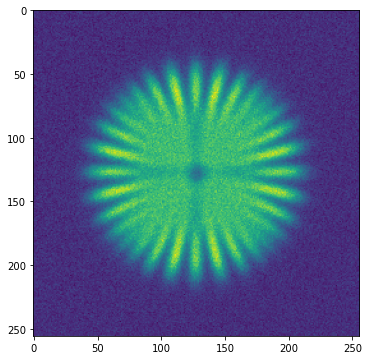

In [57]:
fig=imshow2d(image)